# Mandatory Challenge
## Context
You work in the data analysis team of a very important company. On Monday, the company shares some good news with you: you just got hired by a major retail company! So, let's get prepared for a huge amount of work!

Then you get to work with your team and define the following tasks to perform:   
1. You need to start your analysis using data from the past.  
2. You need to define a process that takes your daily data as an input and integrates it.  

You are in charge of the second part, so you are provided with a sample file that you will have to read daily. To complete you task, you need the following aggregates:
* One aggregate per store that adds up the rest of the values.
* One aggregate per item that adds up the rest of the values.

You can import the dataset `warehouse_and_retail_sales` from Ironhack's database. 

## Your task
Therefore, your process will consist of the following steps:
1. Read the sample file that a daily process will save in your folder. 
2. Clean up the data.
3. Create the aggregates.
4. Write three tables in your local database: 
    - A table for the cleaned data.
    - A table for the aggregate per supplier.
    - A table for the aggregate per item.

## Instructions
* Read the csv you can find in Ironhack's database.
* Clean the data and create the aggregates as you consider.
* Create the tables in your local database.
* Populate them with your process.

In [81]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

main_data = pd.read_csv("Warehouse_and_Retail_Sales.csv")
main_data = main_data.copy()

main_data.dtypes

YEAR                  int64
MONTH                 int64
SUPPLIER             object
ITEM CODE            object
ITEM DESCRIPTION     object
ITEM TYPE            object
RETAIL SALES        float64
RETAIL TRANSFERS    float64
WAREHOUSE SALES     float64
dtype: object

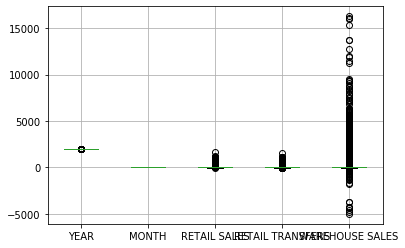

In [82]:
main_data.boxplot()
plt.show()

In [83]:
main_data.head(10)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0
5,2017,4,REPUBLIC NATIONAL DISTRIBUTING CO,101680,MANISCHEWITZ CREAM WH CONCORD - 1.5L,WINE,0.0,1.0,0.0
6,2017,4,ROYAL WINE CORP,101753,BARKAN CLASSIC PET SYR - 750ML,WINE,0.0,1.0,0.0
7,2017,4,JIM BEAM BRANDS CO,10197,KNOB CREEK BOURBON 9YR - 100P - 1.75L,LIQUOR,0.0,32.0,0.0
8,2017,4,STE MICHELLE WINE ESTATES,101974,CH ST MICH P/GRIS - 750ML,WINE,0.0,26.0,0.0
9,2017,4,MONSIEUR TOUTON SELECTION,102083,CH DE LA CHESNAIE MUSCADET - 750ML,WINE,0.0,1.0,0.0


In [84]:
main_data.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,128355.000000,128355.000000,128355.000000,128355.000000,128355.000000
mean,2017.206030,7.079303,6.563037,7.188161,22.624213
std,0.404454,3.645826,28.924944,30.640156,239.693277
min,2017.000000,1.000000,-6.490000,-27.660000,-4996.000000
25%,2017.000000,5.000000,0.000000,0.000000,0.000000
50%,2017.000000,8.000000,0.330000,0.000000,1.000000
75%,2017.000000,10.000000,3.250000,4.000000,4.000000
max,2018.000000,12.000000,1616.600000,1587.990000,16271.750000


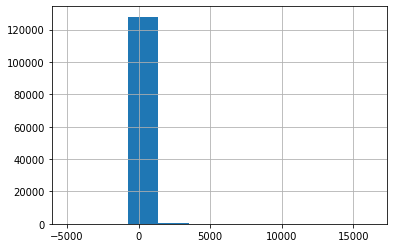

In [85]:
main_data["WAREHOUSE SALES"].hist()
plt.show()

In [86]:
new_data

NameError: name 'new_data' is not defined

In [ ]:
main_data.info()

In [87]:
main_data.isna().sum()

YEAR                 0
MONTH                0
SUPPLIER            24
ITEM CODE            0
ITEM DESCRIPTION     0
ITEM TYPE            1
RETAIL SALES         0
RETAIL TRANSFERS     0
WAREHOUSE SALES      0
dtype: int64

In [88]:
sortednew = main_data.sort_values(["ITEM TYPE"],ascending=False)
sortednew.head(20)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.00,1.0,0.0
76108,2017,11,A VINTNERS SELECTIONS,300607,COLTIBUONO CHN CL R STUCCHI - 750ML,WINE,0.00,0.0,11.0
75174,2017,11,RELIABLE CHURCHILL LLLP,24430,BODEGA NORTON CAB - 750ML,WINE,0.08,0.0,0.0
75165,2017,11,FETZER VINEYARDS,24384,FETZER ANTHONYS HILL P/GRIG - 1.5L,WINE,18.17,21.0,2.0
75158,2017,11,CONSTELLATION BRANDS,24333,WILD HORSE P/NOIR - 750ML,WINE,12.40,13.0,1.0
75138,2017,11,TREASURY WINE ESTATES AMERICAS COMPANY,24147,STAGS LEAP PET SYR - 750ML,WINE,2.05,0.0,0.0
75137,2017,11,BACCHUS IMPORTERS LTD,24139,FROGS LEAP CAB - 750ML,WINE,3.11,0.0,0.0
75135,2017,11,BACCHUS IMPORTERS LTD,24120,FROGS LEAP MER - 750ML,WINE,3.01,1.0,0.0
75126,2017,11,REPUBLIC NATIONAL DISTRIBUTING CO,24007,SEBASTIANI SONOMA P/NOIR - 750ML,WINE,3.82,0.0,0.0
75101,2017,11,BARON FRANCOIS LTD,23850,BADER MIMEUR CHASS MONT BLC - 750ML,WINE,0.57,0.0,0.0


In [89]:
sortednew = sortednew.sort_values(["ITEM TYPE"],ascending=True)

In [90]:
# Remove negative values from retail sales and warehouse sales 
sortednew = sortednew[sortednew["RETAIL SALES"] > 0]
sortednew= sortednew[sortednew['WAREHOUSE SALES'] <15000]
sortednew

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
47951,2017,9,WARSTEINER IMPORTERS,23835,WARSTEINER OCTOBERFEST 4/6 NR - 12OZ,BEER,4.25,9.00,34.0
47965,2017,9,DOGFISH HEAD CRAFT BREWERY,23900,DOGFISH HEAD SAISON DU BUFF 6/4 NR - 12OZ,BEER,1.35,0.00,2.0
19343,2017,6,LEGENDS LTD,12426,SOUTHERN TIER THICK MINT - 12OZ,BEER,0.68,0.00,0.0
47975,2017,9,MILLER BREWING COMPANY,23939,COORS LIGHT HIGH GRAPHICS LOOSE NR - 12OZ,BEER,180.00,142.00,269.0
69588,2017,10,LEGENDS LTD,6971,UNIBROUE LA FIN DU MONDE 6/4 12.OZ NR,BEER,2.21,4.00,13.0
...,...,...,...,...,...,...,...,...,...
91985,2017,12,QUINTESSENTIAL LLC,314322,NEW AGE RED - 750ML,WINE,3.43,1.92,1.0
91937,2017,12,BACCHUS IMPORTERS LTD,313882,GIN LANE 1751 LONDON DRY GIN NV - 750ML,WINE,3.05,0.00,0.0
91938,2017,12,SUTTER HOME WINERY INC,313883,MENAGE A TROIS P/GRIG - 750ML,WINE,4.90,4.00,3.0
91939,2017,12,SUTTER HOME WINERY INC,313885,MENAGE A TROIS CAB - 750ML,WINE,10.51,11.00,14.0


In [91]:
sortednew.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
47951,2017,9,WARSTEINER IMPORTERS,23835,WARSTEINER OCTOBERFEST 4/6 NR - 12OZ,BEER,4.25,9.0,34.0
47965,2017,9,DOGFISH HEAD CRAFT BREWERY,23900,DOGFISH HEAD SAISON DU BUFF 6/4 NR - 12OZ,BEER,1.35,0.0,2.0
19343,2017,6,LEGENDS LTD,12426,SOUTHERN TIER THICK MINT - 12OZ,BEER,0.68,0.0,0.0
47975,2017,9,MILLER BREWING COMPANY,23939,COORS LIGHT HIGH GRAPHICS LOOSE NR - 12OZ,BEER,180.00,142.0,269.0
69588,2017,10,LEGENDS LTD,6971,UNIBROUE LA FIN DU MONDE 6/4 12.OZ NR,BEER,2.21,4.0,13.0


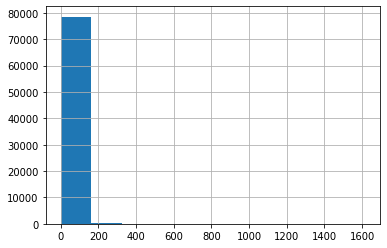

In [92]:
sortednew["RETAIL SALES"].hist()

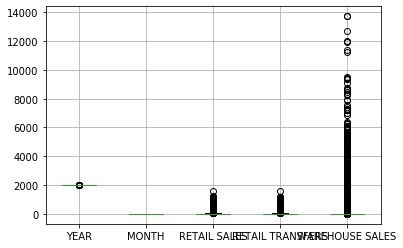

In [93]:
 sortednew.boxplot()

In [122]:
data_by_store_agg = sortednew.groupby(['ITEM CODE']).sum()

In [123]:
 data_by_store_agg #Store aggregated by item code

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
ITEM CODE,,,,,
10014,6051,33,1.00,1.00,13.00
100200,16138,56,2.01,0.00,0.00
100293,18155,64,10.06,8.00,77.00
10030,2017,12,0.08,0.00,0.00
100641,8070,21,1.46,2.00,33.00
...,...,...,...,...,...
99770,8069,33,8.50,8.00,14.00
9989,4034,23,1.00,0.00,8.00
9997,18155,64,791.60,814.92,2384.05


In [110]:
data_by_item_agg = sortednew.groupby(['ITEM CODE']).sum()

In [111]:
data_by_item_agg.head()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
ITEM CODE,,,,,
10014,6051,33,1.00,1.0,13.0
100200,16138,56,2.01,0.0,0.0
100293,18155,64,10.06,8.0,77.0
10030,2017,12,0.08,0.0,0.0
100641,8070,21,1.46,2.0,33.0


In [112]:
data_by_item_agg.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,11851.000000,11851.000000,11851.000000,11851.000000,11851.000000
mean,13467.391444,48.232385,70.832776,70.283340,180.545677
std,5690.691246,20.504000,264.425129,266.977892,1886.126819
min,2017.000000,1.000000,0.030000,-6.080000,-3.000000
25%,8070.000000,33.000000,1.630000,0.000000,0.000000
50%,16138.000000,62.000000,8.480000,6.000000,2.000000
75%,18155.000000,64.000000,46.260000,44.920000,27.000000
max,18155.000000,64.000000,8684.550000,8684.550000,74958.710000


In [113]:
data_by_item_agg.to_csv('../item_aggregated.csv')

In [114]:
data_by_item_agg.head()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
ITEM CODE,,,,,
10014,6051,33,1.00,1.0,13.0
100200,16138,56,2.01,0.0,0.0
100293,18155,64,10.06,8.0,77.0
10030,2017,12,0.08,0.0,0.0
100641,8070,21,1.46,2.0,33.0


In [125]:
data_by_item_agg.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,11851.000000,11851.000000,11851.000000,11851.000000,11851.000000
mean,13467.391444,48.232385,70.832776,70.283340,180.545677
std,5690.691246,20.504000,264.425129,266.977892,1886.126819
min,2017.000000,1.000000,0.030000,-6.080000,-3.000000
25%,8070.000000,33.000000,1.630000,0.000000,0.000000
50%,16138.000000,62.000000,8.480000,6.000000,2.000000
75%,18155.000000,64.000000,46.260000,44.920000,27.000000
max,18155.000000,64.000000,8684.550000,8684.550000,74958.710000


In [126]:
driver = 'mysql+pymysql'
user = 'root'
password = '*********'
ip = 'localhost'
database = 'Warehouse_and_Retail_Sales'

In [127]:
connection_string = f'{driver}://{user}:{password}@{ip}/{database}'

In [128]:
engine = create_engine(connection_string)

In [131]:
sortednew.to_sql('sortednew', engine)

In [130]:
data_by_store_agg.to_sql('data_by_store_agg', engine)
data_by_item_agg.to_sql('data_by_item_agg', engine)